# Cross validation


In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

Rozważmy następujący zbiór punktów:

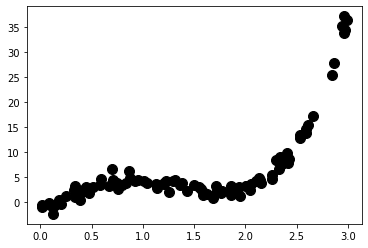

In [2]:
x = stats.uniform(0,3).rvs(100)
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
y = f(x) + stats.norm(0,0.9).rvs(len(x))
plt.plot(x, y, 'ok', ms=10);
plt.show()

# Zadanie
Podziel zbiór danych na część testową i treningową. 
Naucz model na części treningowej i oceń wyniki na części testowej.

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60,) (60,)
(40,) (40,)


In [4]:
X_train=np.vstack(X_train)
X_test=np.vstack(X_test)

In [5]:
model2 = make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression())
model2.fit(X_train, y_train)
model2.predict(X_test)

array([-3.71592152e-01, -6.12950527e-01,  3.55047192e+00, -3.20774568e-01,
        7.28400028e-01,  1.24280043e+01,  1.17434928e+01,  6.79852391e+00,
        1.41068551e+00,  3.24978110e+00,  1.56483693e+01,  1.54952863e+00,
        5.88202528e+00,  6.78699649e+00,  9.84878438e-02, -4.73870743e-01,
        2.64928061e-01, -6.88299643e-02, -6.25853646e-01, -5.59287856e-01,
        8.77057408e+00,  2.58254699e+00,  4.91602006e+00,  4.99200146e+00,
        3.95525764e+00,  5.63191179e-02,  2.61155801e+01,  3.49107926e+00,
        1.19972870e+01,  1.73428827e+01, -4.66230958e-01, -8.87346727e-03,
        3.35005245e-01,  8.27004195e+00,  2.31371339e+01,  2.54833619e+01,
        1.83432255e+01,  8.59514899e+00,  1.17714957e+01, -4.08936102e-01])

In [6]:
from sklearn import  metrics
print("R^2: {}".format(metrics.r2_score(y_test, model2.predict(X_test)) ))
print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model2.predict(X_test)) ))
print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model2.predict(X_test)) ))
print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model2.predict(X_test)) ))
print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model2.predict(X_test)) ))

R^2: 0.7352997082380095
Explained variance score: 0.7428553491987917
Median absolute error: 3.5535344654795864
Mean squared error: 19.49799710102177
Mean absolute errors: 3.8802846013951653


# Zadanie
Wylicz powyższe miary dla wszytkich modeli:

- regrsji linowej
- regrsji wielomianowej stopnia 2
- regrsji wielomianowej stopnia 3
- regrsji wielomianowej stopnia 4
- regrsji wielomianowej stopnia 5
- regrsji wielomianowej stopnia 25

In [7]:
models = []
models.append(('LR', linear_model.LinearRegression()))
models.append(('PR2', make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression()) ))
models.append(('PR3', make_pipeline(PolynomialFeatures(3), linear_model.LinearRegression()) ))
models.append(('PR4', make_pipeline(PolynomialFeatures(4), linear_model.LinearRegression()) ))
models.append(('PR5', make_pipeline(PolynomialFeatures(5), linear_model.LinearRegression()) ))
models.append(('PR6', make_pipeline(PolynomialFeatures(6), linear_model.LinearRegression()) ))
models.append(('PR25', make_pipeline(PolynomialFeatures(25), linear_model.LinearRegression()) ))

for name, model in models:
    print(name)
    model.fit(X_train, y_train)
    print("R^2: {}".format(metrics.r2_score(y_test, model.predict(X_test)) ))
    print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model.predict(X_test)) ))
    print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model.predict(X_test)) ))
    print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model.predict(X_test)) ))
    print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model.predict(X_test)) ))

LR
R^2: 0.4360340136472547
Explained variance score: 0.4370873310827912
Median absolute error: 3.509634874527908
Mean squared error: 41.542104444932484
Mean absolute errors: 4.508908789677544
PR2
R^2: 0.7352997082380095
Explained variance score: 0.7428553491987917
Median absolute error: 3.5535344654795864
Mean squared error: 19.49799710102177
Mean absolute errors: 3.8802846013951653
PR3
R^2: 0.9836850814223623
Explained variance score: 0.9844881689140402
Median absolute error: 0.66744567607173
Mean squared error: 1.2017676029470268
Mean absolute errors: 0.821271049406155
PR4
R^2: 0.9873787596577078
Explained variance score: 0.9891419351584655
Median absolute error: 0.4247679929789232
Mean squared error: 0.9296888415468253
Mean absolute errors: 0.6917732282887726
PR5
R^2: 0.986664297359737
Explained variance score: 0.9881952831600698
Median absolute error: 0.5366515716060725
Mean squared error: 0.9823166030120409
Mean absolute errors: 0.7236875600324902
PR6
R^2: 0.9879642283079664
Expla

In [9]:
models = []
models.append(('LR', linear_model.LinearRegression()))
models.append(('PR2', make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression()) ))
models.append(('PR3', make_pipeline(PolynomialFeatures(3), linear_model.LinearRegression()) ))
models.append(('PR4', make_pipeline(PolynomialFeatures(4), linear_model.LinearRegression()) ))
models.append(('PR5', make_pipeline(PolynomialFeatures(5), linear_model.LinearRegression()) ))
models.append(('PR6', make_pipeline(PolynomialFeatures(6), linear_model.LinearRegression()) ))
models.append(('PR25', make_pipeline(PolynomialFeatures(25), linear_model.LinearRegression()) ))

for name, model in models:
    print(name)
    model.fit(X_train, y_train)
    print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_true=y_test, y_pred=model.predict(X_test)) ))

LR
Mean absolute errors: 4.508908789677544
PR2
Mean absolute errors: 3.8802846013951653
PR3
Mean absolute errors: 0.821271049406155
PR4
Mean absolute errors: 0.6917732282887726
PR5
Mean absolute errors: 0.7236875600324902
PR6
Mean absolute errors: 0.6741340817312362
PR25
Mean absolute errors: 1.0056404219737967
